# Практическое задание по ОММ №1
#### Вариант №26
### Шведова Анна 329 группа
---------------------------------------------



# Постановка задачи
Используя схему бегущего счета и итерационные методы, решить задачу для квазилинейного уравнением переноса:
$$\frac{\partial u}{\partial t} - \frac{2+\cos{u}}{1+(2u+1+\sin{u})^2}\frac{\partial u}{\partial x} = 0, -1\leq x<0$$
$$u(x,0)=\cos{\frac{\pi x}{2}}$$
$$u(0,t)=1+\frac{1}{2}\arctan{t}$$


Уравнение характеристик будет иметь вид:
$$\frac{dt}{1}=-\frac{1+(2u+1+\sin{u})^2}{2+\cos{u}}dx=\frac{du}{0}$$

1. Пусть $t_0 = 0, -1\leq x_0 <0$. Тогда $u_0 = \cos{\frac{\pi x_0}{2}}$, и получаем уравнение проекций характеристик на плоскость $(x,t)$:
$$t=-\frac{1+(2u_0 + 1 + \sin{u_0})^2}{2+\cos{u_0}}(x-x_0)$$
2. Пусть $x_0 = 0, t_0 \geq 0$. Тогда $u_0 = 1+\frac{1}{2}\arctan{t_0}$, и получаем уравнение проекций характеристик на плоскость $(x,t)$:
$$t=-\frac{1+(2u_0 + 1 + \sin{u_0})^2}{2+\cos{u_0}}x + t_0$$
Как видно из построенных графиков, характеристики не пересекаются в области $x \in [-1, 0), t \in (0, \infty)$, значит, в этой области решение определено однозначно. При $t_0 = 0$ решение определяется начальным условием, при $x_0 = 0$ $-$ граничным. Тогда можем выбрать $t=1$ в качестве верхней границы временного отрезка, будем решать задачу в этой области.

<IPython.core.display.Javascript object>


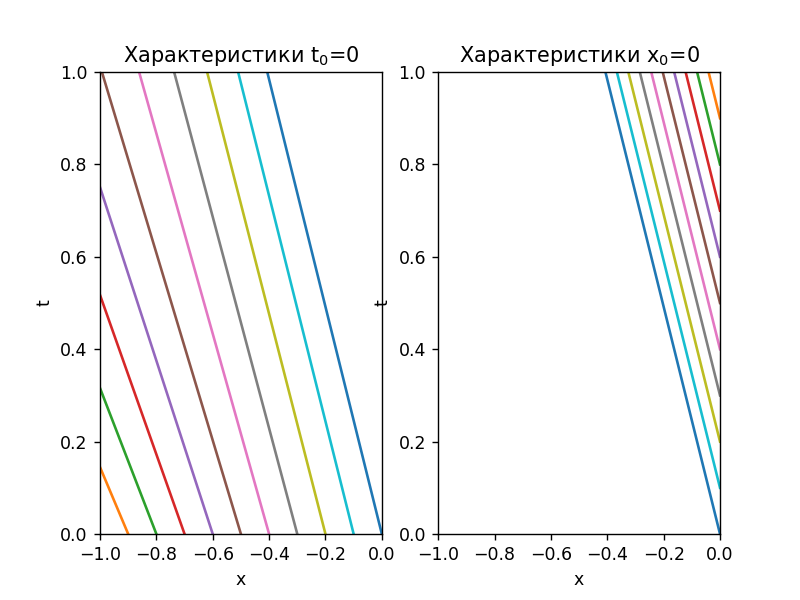

In [84]:
import math 
from math import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

def ch1(x):
    return [-((1+(2*cos(math.pi*x0/2)+1+sin(cos(math.pi*x0/2))**2)/(2+cos(cos(math.pi*x0/2))))*(x-x0)) for x0 in np.arange(-1, 0.1, .1)]
def ch2(x):
    return [(1/((2-(4/math.pi)*math.atan(2))*exp(-t0)) * (x) + t0) for t0 in np.arange(-1, 0.1, .1)]
def ch2(x):
    return [-((1+(2*(1+0/5*math.atan(t0))+1+sin(1+0/5*math.atan(t0))**2)/(2+cos(1+0/5*math.atan(t0)))) * (x) + t0) for t0 in np.arange(-1, 0.1, .1)]
x_list = np.arange(-1, 0.1, .1)

ch1_list = [ch1(x) for x in x_list]
ch2_list = [ch2(x) for x in x_list]

#ch2_list
%matplotlib notebook

plt.subplot(1, 2, 1)
plt.ylim(0,1)
#plt.ylim(0,2)
plt.xlim(-1,0)
plt.plot(x_list, ch1_list) 
plt.title('Характеристики t$_{0}$=0',loc='center')
plt.ylabel('t')
plt.xlabel('x')
plt.subplot(1, 2, 2)
plt.ylim(0,1)
plt.xlim(-1,0)
plt.plot(x_list, ch2_list) 
plt.title('Характеристики x$_{0}$=0',loc='center')
plt.ylabel('t')
plt.xlabel('x')
plt.show()

# Разностная схема и метод Ньютона
Заметим, что граничные условия заданы на правой границе. Для реализации разностной схемы требуется сделать такую замену, что граничные условия были бы заданы на левой границе. Сделаем замену $\xi = -x$. Тогда $\frac{\partial}{\partial x} = -\frac{\partial}{\partial \xi}$ и $u(x) = u(-\xi) = \tilde u(\xi)$. Тогда задача запишется в виде:
$$\frac{\partial \tilde u}{\partial t} + \frac{2+\cos{\tilde u}}{1+(2\tilde u+1+\sin{\tilde u})^2}\frac{\partial \tilde u}{\partial \xi} = 0, 0\leq \xi<1$$
$$\tilde u(0,t)=1+\frac{1}{2}\arctan{t}$$

Теперь у нашей задачи граничные условия заданы на левой границе, и мы можем применить разностную схему для ее решения.

Введем в области рассмотрения $\Omega = \left\{(\xi,t):0 < \xi \leq 1, 0\leq t \leq 1\right\}$ равномерную сетку, на которой будем строить разностную схему:
    $$\omega_{h\tau} = \left\{ \xi = nh, n=0,...,N,h = \frac{1}{N}, t_m = m\tau, m = 0,...,M \right\}$$
где N $-$ число узлов вдоль оси $\xi$, M $-$ число узлов вдоль оси $t$, h $-$ шаг по $\xi$, $\tau$ $-$ шаг по времени. На сетке $\omega_{h\tau}$ будем рассматривать сеточную функцию $\tilde u_n^m = \tilde u(\xi_n, t_m)$. Перепишем уравнение, выделив производную сложной функции:
    $$\frac{\partial \tilde u}{\partial t} + \frac{2+\cos{\tilde u}}{1+(2\tilde u+1+\sin{\tilde u})^2}\frac{\partial \tilde u}{\partial \xi} = \frac{\partial \tilde u}{\partial t} + \frac{\partial \arctan{(2\tilde u +1 + \sin{\tilde u})}}{\partial \xi} = 0$$

Обозначим $U(\tilde u) = \arctan(2\tilde u + 1 + \sin{\tilde u}), U_n^m = U(\tilde u_n^m)$ $-$ вспомогательная функция. Для построения разностной схемы (схемы бегущего счета) рассмотрим аппроксимацию с помощью четырехточечного шаблона. Тогда аппроксимация для первого уравнения системы имеет вид:
    $$\frac{\tilde u_n^{m+1}-\tilde u_n^m+\tilde u_{n+1}^{m+1}-\tilde u_{n+1}^m}{2\tau} + \frac{U_{m+1}^{n+1} - U_{m+1}^{n} + U_{m}^{n+1} - U_{m}^{n}}{2h}=0$$,
        $$n = 0,...,N-1, m = 0,...,M-1$$
Для начального и граничного условий:
        $$\tilde u_n^0 = \cos{\frac{\pi \xi _n}{2}}\\
        \tilde u_0^m = 1 + \frac{1}{2}\arctan{t_m}$$
Тогда разностная схема имеет вид:
         $$\frac{\tilde u_n^{m+1}-\tilde u_n^m+\tilde u_{n+1}^{m+1}-\tilde u_{n+1}^m}{2\tau} + \frac{U_{m+1}^{n+1} - U_{m+1}^{n} + U_{m}^{n+1} - U_{m}^{n}}{2h}=0$$
         $$U_n^m = \arctan{2\tilde u_n^m +1 + \sin{\tilde u_n^m}}$$
         $$\tilde u_n^0 = \cos{\frac{\pi \xi _n}{2}}$$
         $$\tilde u_0^m = 1 + \frac{1}{2}\arctan{t_m}$$
Полученную задачу будем решать при помощи схемы бегущего счета и итерационного метода Ньютона. Зная значение сеточной функции для некоторого $t_m$, вычислим значение функции для $t_{m+1}$ при $n$, пробегающем все допустимые значения, и учитывая, что $\tilde u_0^{m+1}$ известно из граничного условия. Выпишем уравнение при $n=0$:
    $$f\left( \tilde u_{1}^{m+1} \right) = \frac{\tilde u_n^{m+1}-\tilde u_n^m+\tilde u_{n+1}^{m+1}-\tilde u_{n+1}^m}{2\tau} + \frac{U_{m+1}^{n+1} - U_{m+1}^{n} + U_{m}^{n+1} - U_{m}^{n}}{2h}=0$$,
    $$f^\prime \left( \tilde u_1^{m+1} \right) = \frac{1}{2\tau} + \frac{2+\cos{\tilde u_1^{m+1}}}{1+\left( 2\tilde u_2^{m+1} + 1 +\sin{\tilde u_1^{m+1}} \right)^2} \frac{1}{2h}$$
Пусть $\tilde u_1^m$ $-$ приближение к корню $\tilde u_1^{m+1}$. Тогда, используя метод Ньютона, получим:
    $$\tilde u_1^{m+1} = \tilde u_1^m - \frac{f\left( \tilde u_{1}^{m} \right)}{f^\prime \left( \tilde u_1^{m} \right)}$$
Процесс останавливается при $|\tilde u_1^{m+1} - \tilde u_1^m| < \epsilon$, где $\epsilon$ $-$ заданная точность.

In [85]:
def F(m,n):
    return(math.atan(2 * y[m][n] + 1 + sin(y[m][n])))
def f(mp1, np1): 
    n = np1-1
    m = mp1-1
    return ( float(y[mp1][n]-y[m][n] + y[mp1][np1]-y[m][np1]) / (2.*h_t) + float(F(mp1, np1)-F(mp1,n) + F(m, np1)-F(m,n)) / (2.*h_x) )

def df(mp1,np1):
    return (1/(2.*h_t) + ((2 + cos(y[mp1][np1]))/(1 + (2 * y[mp1][np1] + 1 + sin(y[mp1][np1]))**2))/(2. * h_x))
    

In [86]:
epsilon = 0.0001
N = 50; M = 50
T_begin = 0.; T_end = 1.
X_begin = -1.; X_end = 0.
h_x=(X_end - X_begin)/(N-1)
h_t=(T_end - T_begin)/(M-1)
y=np.zeros((M,N))
for n in np.arange(N):
        y[0][n] = (cos(math.pi * h_t * n/2))

for m in np.arange(M):
        y[m][0] = (1 + 0.5 * math.atan(h_t * m))
        

In [87]:
for m in np.arange(M)[0:M-1]:
    for n in np.arange(N)[0:N-1]:
        eps = epsilon + 1;
        while eps > epsilon:
            ep = f(m+1, n+1) / float(df( m+1, n+1))
            y[m+1][n+1] = y[m+1][n+1] - ep
            eps = abs(ep) 
            #if n == 15:
               # print(ep)

<IPython.core.display.Javascript object>


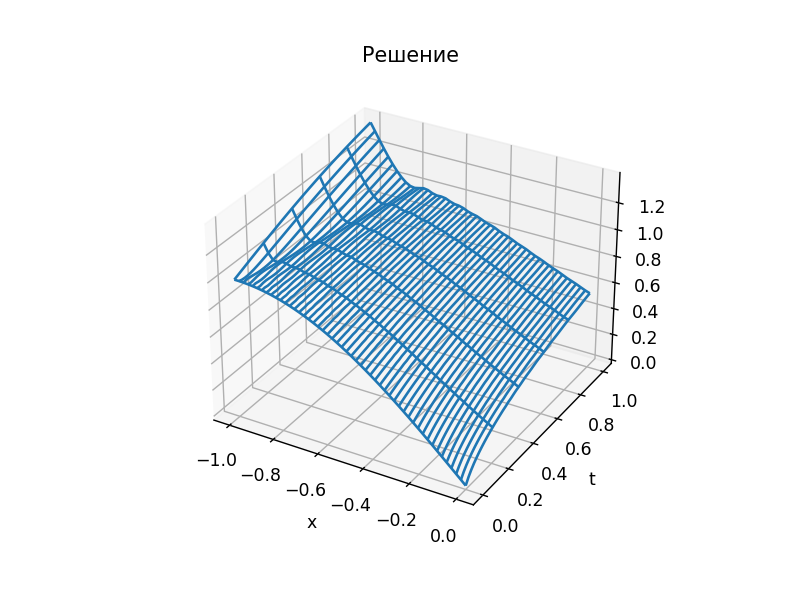

In [90]:
%matplotlib notebook

tm = np.linspace(T_begin,T_end, num=M)
xn = np.linspace(X_begin, X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, T, y, rstride=10,cstride=1)
plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

# Устойчивость решения

## Критерий устойчивости Неймана

<img src='омм2.jpg'/>

Получаем, что разностная схема абсолютно устойчива 

## Достаточное условие устойчивости - критерий Куранта

<img src='омм1.jpg'/>

Получаем, что разностная схема удовлетворяет условиям устойчивости для любых соотношений шагов по координате и времени

## Геометрический критерий устойчивости
Если мы имеем четырехточечный шаблон, то как бы мы ни проводили характеристику $x-ct=const$, она будет пересекать отрезок, соединяющий точки шаблона, в которых решение (значение сеточной функции) известно. Таким образом, четырехточечный шаблон гарантирует безусловную устойчивость по геометрическому критерию

<img src='омм3.jpg'/>

# Порядок аппроксимации
Вычислим невязку для четырехточечного шаблона

<img src='омм4.jpg'/>

Получаем, что разностная схема аппроксимирует задачу со вторым порядком малости и по пространственной, и по временной координатам